In [170]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [171]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics/master/train_LZdllcl.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics/master/test_2umaH9m.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics/master/sample_submission_M0L0uXE.csv')

In [172]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [173]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [175]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
previous_year_rating,4124,0.075244
education,2409,0.043953
is_promoted,0,0.000000


In [176]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [177]:
men=train.loc[train.gender=='m']["is_promoted"]
rate_men=sum(men)/len(men)
print("% of men promoted:", rate_men)

% of men promoted: 0.08315149625935161


In [178]:
women=train.loc[train.gender=='f']["is_promoted"]
rate_women=sum(women)/len(women)
print("% of women promoted:", rate_women)

% of women promoted: 0.08993379107405591


In [179]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [180]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [182]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
previous_year_rating,1812,0.077139
education,1034,0.044019
avg_training_score,0,0.000000


In [183]:
# fill up MSZoning with the mode value
train['education'] = train['education'].fillna(train['education'].mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].median())
test['previous_year_rating'] = test['previous_year_rating'].fillna(train['previous_year_rating'].median())

In [184]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [185]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [186]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [187]:
train_dept=train.groupby('department')['is_promoted'].sum().reset_index()
train_dept

,department,is_promoted
0,Analytics,512
1,Finance,206
2,HR,136
3,Legal,53
4,Operations,1023
5,Procurement,688
6,R&D,69
7,Sales & Marketing,1213
8,Technology,768


In [188]:
dept={'Analytics':0, 'Finance':1, 'HR': 2, 'Legal':3, 'Operations':4, 'Procurement':5, 'R&D':6, 'Sales & Marketing':7, 'Technology':8}
train.department=train.department.map(dept)
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,4,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,0,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,7,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [189]:
dept={'Analytics':0, 'Finance':1, 'HR': 2, 'Legal':3, 'Operations':4, 'Procurement':5, 'R&D':6, 'Sales & Marketing':7, 'Technology':8}
test.department=test.department.map(dept)
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,2,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,7,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,5,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,1,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,8,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,2,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,5,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [190]:
train_region=train.groupby('region')['is_promoted'].sum().reset_index()
train_region

,region,is_promoted
0,region_1,58
1,region_10,51
2,region_11,74
3,region_12,33
4,region_13,230
5,region_14,62
6,region_15,222
7,region_16,102
8,region_17,109
9,region_18,1


In [191]:
train['region'] = train['region'].map(lambda x: x.lstrip('region_'))
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,4,27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,0,1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,7,9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [192]:
test['region'] = test['region'].map(lambda x: x.lstrip('region_'))
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,2,4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,7,13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,5,2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,1,29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,8,25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,2,16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,5,31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [193]:
train["region"] = train["region"].astype(str).astype(int)
print(train.dtypes)

employee_id               int64
department                int64
region                    int64
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


In [194]:
test["region"] = test["region"].astype(str).astype(int)
print(train.dtypes)

employee_id               int64
department                int64
region                    int64
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


In [195]:
train_ed=train.groupby('education')['is_promoted'].sum().reset_index()
train_ed

,education,is_promoted
0,Bachelor's,3130
1,Below Secondary,67
2,Master's & above,1471


In [196]:
train['education'] = train['education'].map(lambda x: x.rstrip('& above'))
train['education'] = train['education'].map(lambda x: x.rstrip("'s"))
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,Master,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,22,Bachelor,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,19,Bachelor,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,23,Bachelor,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,26,Bachelor,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,14,Bachelor,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,4,27,Master,f,other,1,37,2.0,6,0,0,56,0
54805,13918,0,1,Bachelor,m,other,1,27,5.0,3,1,0,79,0
54806,13614,7,9,Bachelor,m,sourcing,1,29,1.0,2,0,0,45,0


In [197]:
test['education'] = test['education'].map(lambda x: x.rstrip('& above'))
test['education'] = test['education'].map(lambda x: x.rstrip("'s"))
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,Bachelor,m,sourcing,1,24,3.0,1,1,0,77
1,74430,2,4,Bachelor,f,other,1,31,3.0,5,0,0,51
2,72255,7,13,Bachelor,m,other,1,31,1.0,4,0,0,47
3,38562,5,2,Bachelor,f,other,3,31,2.0,9,0,0,65
4,64486,1,29,Bachelor,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,8,25,Bachelor,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,2,16,Bachelor,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,5,31,Bachelor,m,sourcing,3,27,3.0,1,0,0,70


In [198]:
ed={'Below Secondary':0, 'Bachelor':1, 'Master': 2}
train.education=train.education.map(ed)
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,22,1,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,19,1,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,23,1,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,26,1,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,14,1,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,4,27,2,f,other,1,37,2.0,6,0,0,56,0
54805,13918,0,1,1,m,other,1,27,5.0,3,1,0,79,0
54806,13614,7,9,1,m,sourcing,1,29,1.0,2,0,0,45,0


In [199]:
ed={'Below Secondary':0, 'Bachelor':1, 'Master': 2}
test.education=test.education.map(ed)
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,1,m,sourcing,1,24,3.0,1,1,0,77
1,74430,2,4,1,f,other,1,31,3.0,5,0,0,51
2,72255,7,13,1,m,other,1,31,1.0,4,0,0,47
3,38562,5,2,1,f,other,3,31,2.0,9,0,0,65
4,64486,1,29,1,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,2,0,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,8,25,1,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,2,16,1,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,5,31,1,m,sourcing,3,27,3.0,1,0,0,70


In [200]:
train_sex=train.groupby('gender')['is_promoted'].sum().reset_index()
train_sex

,gender,is_promoted
0,f,1467
1,m,3201


In [201]:
sex={'f':0, 'm':1}
train.gender=train.gender.map(sex)
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,22,1,1,other,1,30,5.0,4,0,0,60,0
2,7513,7,19,1,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,23,1,1,other,2,39,1.0,10,0,0,50,0
4,48945,8,26,1,1,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,14,1,1,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,4,27,2,0,other,1,37,2.0,6,0,0,56,0
54805,13918,0,1,1,1,other,1,27,5.0,3,1,0,79,0
54806,13614,7,9,1,1,sourcing,1,29,1.0,2,0,0,45,0


In [202]:
sex={'f':0, 'm':1}
test.gender=test.gender.map(sex)
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,1,1,sourcing,1,24,3.0,1,1,0,77
1,74430,2,4,1,0,other,1,31,3.0,5,0,0,51
2,72255,7,13,1,1,other,1,31,1.0,4,0,0,47
3,38562,5,2,1,0,other,3,31,2.0,9,0,0,65
4,64486,1,29,1,1,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,2,0,1,sourcing,1,24,3.0,1,0,0,61
23486,25600,8,25,1,1,sourcing,1,31,3.0,7,0,0,74
23487,45409,2,16,1,0,sourcing,1,26,4.0,4,0,0,50
23488,1186,5,31,1,1,sourcing,3,27,3.0,1,0,0,70


In [203]:
train_recruit=train.groupby('recruitment_channel')['is_promoted'].sum().reset_index()
train_recruit

,recruitment_channel,is_promoted
0,other,2556
1,referred,138
2,sourcing,1974


In [204]:
channel={'other':0, 'referred':1, 'sourcing':2}
train.recruitment_channel=train.recruitment_channel.map(channel)
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,22,1,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,19,1,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,23,1,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,26,1,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,14,1,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,27,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,1,1,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,9,1,1,2,1,29,1.0,2,0,0,45,0


In [205]:
channel={'other':0, 'referred':1, 'sourcing':2}
test.recruitment_channel=test.recruitment_channel.map(channel)
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,26,1,1,2,1,24,3.0,1,1,0,77
1,74430,2,4,1,0,0,1,31,3.0,5,0,0,51
2,72255,7,13,1,1,0,1,31,1.0,4,0,0,47
3,38562,5,2,1,0,0,3,31,2.0,9,0,0,65
4,64486,1,29,1,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,2,0,1,2,1,24,3.0,1,0,0,61
23486,25600,8,25,1,1,2,1,31,3.0,7,0,0,74
23487,45409,2,16,1,0,2,1,26,4.0,4,0,0,50
23488,1186,5,31,1,1,2,3,27,3.0,1,0,0,70


In [206]:
train_training=train.groupby('no_of_trainings')['is_promoted'].sum().reset_index()
train_training

,no_of_trainings,is_promoted
0,1,3910
1,2,605
2,3,122
3,4,26
4,5,3
5,6,2
6,7,0
7,8,0
8,9,0
9,10,0


In [207]:
train_age=train.groupby('age')['is_promoted'].sum().reset_index()
train_age

,age,is_promoted
0,20,4
1,21,5
2,22,18
3,23,34
4,24,70
5,25,69
6,26,163
7,27,261
8,28,308
9,29,294


In [208]:
train_rating=train.groupby('previous_year_rating')['is_promoted'].sum().reset_index()
train_rating

,previous_year_rating,is_promoted
0,1.0,88
1,2.0,181
2,3.0,1694
3,4.0,784
4,5.0,1921


In [209]:
train["previous_year_rating"] = train["previous_year_rating"].astype(float).astype(int)
print(train.dtypes)

employee_id             int64
department              int64
region                  int64
education               int64
gender                  int64
recruitment_channel     int64
no_of_trainings         int64
age                     int64
previous_year_rating    int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted             int64
dtype: object


In [210]:
test["previous_year_rating"] = test["previous_year_rating"].astype(float).astype(int)
print(train.dtypes)

employee_id             int64
department              int64
region                  int64
education               int64
gender                  int64
recruitment_channel     int64
no_of_trainings         int64
age                     int64
previous_year_rating    int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted             int64
dtype: object


In [211]:
train_service=train.groupby('length_of_service')['is_promoted'].sum().reset_index()
train_service

,length_of_service,is_promoted
0,1,377
1,2,595
2,3,609
3,4,598
4,5,475
5,6,401
6,7,464
7,8,269
8,9,229
9,10,204


In [212]:
train_kpi=train.groupby('KPIs_met >80%')['is_promoted'].sum().reset_index()
train_kpi

,KPIs_met >80%,is_promoted
0,0,1406
1,1,3262


In [213]:
train_awards=train.groupby('awards_won?')['is_promoted'].sum().reset_index()
train_awards

,awards_won?,is_promoted
0,0,4109
1,1,559


In [214]:
train_trn_score=train.groupby('avg_training_score')['is_promoted'].sum().reset_index()
train_trn_score

,avg_training_score,is_promoted
0,39,0
1,40,0
2,41,1
3,42,2
4,43,7
...,...,...
56,95,45
57,96,47
58,97,49
59,98,37


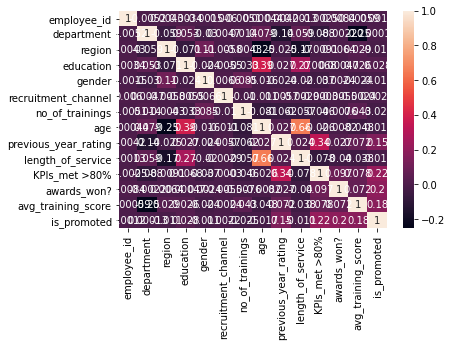

In [215]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [216]:
#prepare data
y = train["is_promoted"]
features = ["department", "region", "education","gender","recruitment_channel", "no_of_trainings", "age","previous_year_rating", "length_of_service", "KPIs_met >80%", "awards_won?", "avg_training_score" ]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [217]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,7,2,0,2,1,35,5,8,1,0,49
1,4,22,1,1,0,1,30,5,4,0,0,60
2,7,19,1,1,2,1,34,3,7,0,0,50
3,7,23,1,1,0,2,39,1,10,0,0,50
4,8,26,1,1,0,1,45,3,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,14,1,1,2,1,48,3,17,0,0,78
54804,4,27,2,0,0,1,37,2,6,0,0,56
54805,0,1,1,1,0,1,27,5,3,1,0,79
54806,7,9,1,1,2,1,29,1,2,0,0,45


In [218]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#bring all features to the same range
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_validation=sc_X.transform(X_validation)

In [219]:
#build models
# Spot Check Algorithms
models = []
models.append(('RFC',RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC: 0.924212 (0.001418)
LR: 0.917461 (0.001370)
LDA: 0.913789 (0.002238)
KNN: 0.915431 (0.002498)
CART: 0.895544 (0.004814)
NB: 0.912809 (0.002010)
SVM: 0.922319 (0.001244)
XGB: 0.930165 (0.003424)


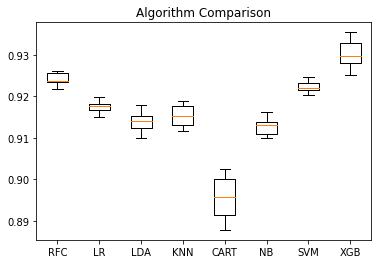

In [220]:
# Compare Algorithms
matplotlib.pyplot.boxplot(results, labels=names)
matplotlib.pyplot.title('Algorithm Comparison')
matplotlib.pyplot.show()

In [221]:
# Make predictions on validation dataset
model = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)
model.fit(X, y)
predictions = model.predict(X_test)

In [225]:
sample_sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [226]:
output = pd.DataFrame({'employee_id': test.employee_id, 'is_promoted': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [227]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
